In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
df = pd.read_csv("digital_wallet_transactions.csv")

In [53]:
df.head()

,idx,transaction_id,user_id,transaction_date,product_category,product_name,merchant_name,product_amount,transaction_fee,cashback,loyalty_points,payment_method,transaction_status,merchant_id,device_type,location,Net Value,date_transaction,time_transaction,date_of_week
0,1,4dac3ea3-6492-46ec-80b8-dc45c3ad0b14,USER_05159,8/19/2023 3:32,Rent Payment,2BHK Flat Deposit,Airbnb,1525.39,36.69,19.19,186,Debit Card,Successful,MERCH_0083,iOS,Urban,1542.89,2023/08/19,03:32,Saturday
1,2,a903ed9f-eb84-47e7-b8aa-fd1786c919cf,USER_07204,8/19/2023 4:37,Gas Bill,Commercial Gas Connection,Adani Gas,1495.40,28.19,89.99,182,UPI,Successful,MERCH_0163,iOS,Urban,1433.60,2023/08/19,04:37,Saturday
2,3,2a393013-733c-4add-9f09-bed1eeb33676,USER_00903,8/19/2023 5:52,Bus Ticket,Semi-Sleeper,MakeMyTrip Bus,1267.71,11.36,95.70,994,UPI,Successful,MERCH_0320,iOS,Urban,1183.37,2023/08/19,05:52,Saturday
3,4,9a07ad19-4673-4794-9cd2-9b139f39c715,USER_01769,8/19/2023 6:35,Internet Bill,4G Unlimited Plan,Airtel Broadband,9202.63,6.41,82.24,409,Debit Card,Successful,MERCH_0194,Android,Urban,9126.80,2023/08/19,06:35,Saturday
4,5,76418260-c985-4011-979d-0914604d0d68,USER_03544,8/19/2023 6:36,Loan Repayment,Home Loan EMI,Axis Bank,3100.58,41.15,40.47,837,Debit Card,Successful,MERCH_0504,Android,Urban,3101.26,2023/08/19,06:36,Saturday


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   idx                 5000 non-null   int64  
 1   transaction_id      5000 non-null   object 
 2   user_id             5000 non-null   object 
 3   transaction_date    5000 non-null   object 
 4   product_category    5000 non-null   object 
 5   product_name        5000 non-null   object 
 6   merchant_name       5000 non-null   object 
 7   product_amount      5000 non-null   float64
 8   transaction_fee     5000 non-null   float64
 9   cashback            5000 non-null   float64
 10  loyalty_points      5000 non-null   int64  
 11  payment_method      5000 non-null   object 
 12  transaction_status  5000 non-null   object 
 13  merchant_id         5000 non-null   object 
 14  device_type         5000 non-null   object 
 15  location            5000 non-null   object 
 16  Net Va

In [55]:
df.describe()

,idx,product_amount,transaction_fee,cashback,loyalty_points,Net Value
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,4957.502722,25.188874,50.658782,498.790400,4932.032814
std,1443.520003,2885.034160,14.535298,28.522467,288.962434,2885.079723
min,1.000000,10.090000,0.010000,0.000000,0.000000,-35.790000
25%,1250.750000,2453.977500,12.665000,26.495000,246.000000,2418.705000
50%,2500.500000,4943.685000,25.070000,51.390000,504.000000,4923.985000
75%,3750.250000,7444.815000,37.947500,75.067500,749.000000,7418.465000
max,5000.000000,9996.950000,49.990000,100.000000,999.000000,10015.770000


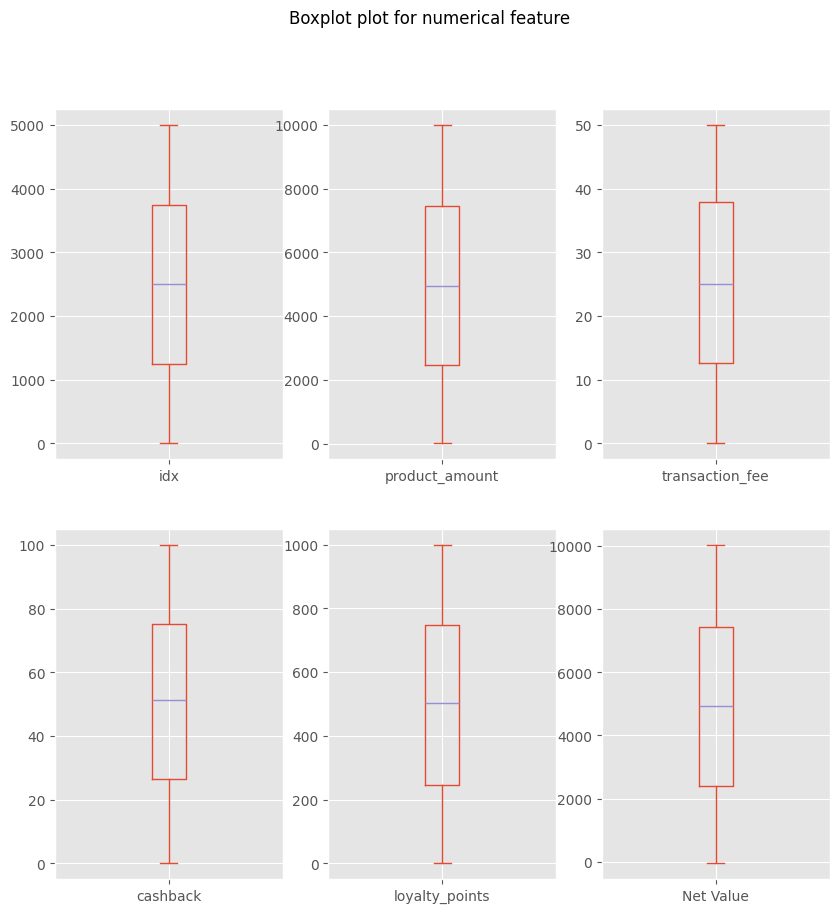

In [56]:
numeric = df.select_dtypes(include=[np.number])
numeric.plot(kind = "box", layout = (2, 3), figsize = (10, 10), subplots = True, sharex = False,
                    title = "Boxplot plot for numerical feature")
plt.show()

In [57]:
df = pd.read_csv("merged_anomaly_output.csv")
df

,idx,transaction_id,user_id,transaction_date,product_category,product_name,merchant_name,product_amount,transaction_fee,cashback,loyalty_points,payment_method,transaction_status,merchant_id,device_type,location,anomaly_label_x,anomaly_label_y
0,1,4dac3ea3-6492-46ec-80b8-dc45c3ad0b14,USER_05159,2023-08-19 03:32,Rent Payment,2BHK Flat Deposit,Airbnb,1525.39,36.69,19.19,186,Debit Card,Successful,MERCH_0083,iOS,Urban,normal,normal
1,2,a903ed9f-eb84-47e7-b8aa-fd1786c919cf,USER_07204,2023-08-19 04:37,Gas Bill,Commercial Gas Connection,Adani Gas,1495.40,28.19,89.99,182,UPI,Successful,MERCH_0163,iOS,Urban,normal,normal
2,3,2a393013-733c-4add-9f09-bed1eeb33676,USER_00903,2023-08-19 05:52,Bus Ticket,Semi-Sleeper,MakeMyTrip Bus,1267.71,11.36,95.70,994,UPI,Successful,MERCH_0320,iOS,Urban,normal,normal
3,4,9a07ad19-4673-4794-9cd2-9b139f39c715,USER_01769,2023-08-19 06:35,Internet Bill,4G Unlimited Plan,Airtel Broadband,9202.63,6.41,82.24,409,Debit Card,Successful,MERCH_0194,Android,Urban,normal,normal
4,5,76418260-c985-4011-979d-0914604d0d68,USER_03544,2023-08-19 06:36,Loan Repayment,Home Loan EMI,Axis Bank,3100.58,41.15,40.47,837,Debit Card,Successful,MERCH_0504,Android,Urban,normal,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,2cad1456-e6dd-4d0f-9463-a071a462c2ae,USER_03918,2024-08-17 19:39,Internet Bill,4G Unlimited Plan,BSNL Broadband,9496.45,37.25,87.47,284,UPI,Successful,MERCH_0203,Android,Rural,normal,normal
4996,4997,df3984f6-cf9d-418f-ad2e-f9d4fff69cd5,USER_09281,2024-08-17 19:42,Education Fee,Python Programming Course,Unacademy,710.40,14.01,55.24,538,Credit Card,Successful,MERCH_0480,iOS,Urban,normal,normal
4997,4998,1c4cd450-785d-4f4c-a08d-cb7c17db9b0c,USER_05939,2024-08-17 23:24,Movie Ticket,Avengers: Endgame,PVR Cinemas,2750.06,48.69,72.10,652,Bank Transfer,Successful,MERCH_0411,Android,Suburban,normal,normal
4998,4999,f88d6fb3-d747-4963-82f3-92e181a93771,USER_09925,2024-08-18 00:28,Mobile Recharge,Data Pack 50GB,BSNL,9976.19,21.96,40.44,614,UPI,Successful,MERCH_0524,iOS,Suburban,normal,normal


In [58]:
df.info()
df.set_index("idx", inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   idx                 5000 non-null   int64  
 1   transaction_id      5000 non-null   object 
 2   user_id             5000 non-null   object 
 3   transaction_date    5000 non-null   object 
 4   product_category    5000 non-null   object 
 5   product_name        5000 non-null   object 
 6   merchant_name       5000 non-null   object 
 7   product_amount      5000 non-null   float64
 8   transaction_fee     5000 non-null   float64
 9   cashback            5000 non-null   float64
 10  loyalty_points      5000 non-null   int64  
 11  payment_method      5000 non-null   object 
 12  transaction_status  5000 non-null   object 
 13  merchant_id         5000 non-null   object 
 14  device_type         5000 non-null   object 
 15  location            5000 non-null   object 
 16  anomal

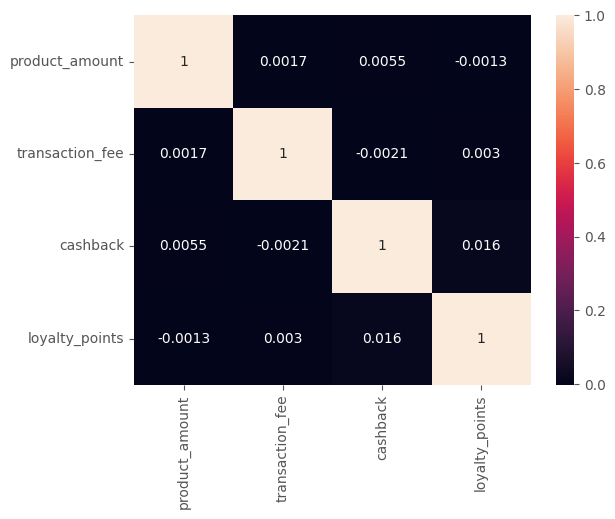

In [59]:
# Kiểm tra độ tương quan giữa các biến numerical
numerical = df.select_dtypes(include=[np.number])
sns.heatmap(numerical.corr(), annot = True)
plt.show()

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 1 to 5000
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   transaction_id      5000 non-null   object 
 1   user_id             5000 non-null   object 
 2   transaction_date    5000 non-null   object 
 3   product_category    5000 non-null   object 
 4   product_name        5000 non-null   object 
 5   merchant_name       5000 non-null   object 
 6   product_amount      5000 non-null   float64
 7   transaction_fee     5000 non-null   float64
 8   cashback            5000 non-null   float64
 9   loyalty_points      5000 non-null   int64  
 10  payment_method      5000 non-null   object 
 11  transaction_status  5000 non-null   object 
 12  merchant_id         5000 non-null   object 
 13  device_type         5000 non-null   object 
 14  location            5000 non-null   object 
 15  anomaly_label_x     5000 non-null   object 
 16  anomaly_lab

In [61]:
# Sử dụng kiểm định thống kê chi bình phương để xác định các feature đưua vào mô hình
from scipy.stats import chi2_contingency

def chi_squared_test(df, col1, col2):
    table = pd.crosstab(df[col1], df[col2])
    chi2, p, dof, expected = chi2_contingency(table)
    return {'columns': (col1, col2), 'p-value': p, 'significant': p < 0.05}
categories = ["location", "transaction_status", "device_type", "merchant_name", "payment_method", "product_category", "product_name"]
for col in categories:
    print(chi_squared_test(df, col, "anomaly_label_x"))


{'columns': ('location', 'anomaly_label_x'), 'p-value': 0.3198299300618123, 'significant': False}
{'columns': ('transaction_status', 'anomaly_label_x'), 'p-value': 0.7590414703494808, 'significant': False}
{'columns': ('device_type', 'anomaly_label_x'), 'p-value': 0.12568641721511742, 'significant': False}
{'columns': ('merchant_name', 'anomaly_label_x'), 'p-value': 0.49012947260776984, 'significant': False}
{'columns': ('payment_method', 'anomaly_label_x'), 'p-value': 0.973332092707605, 'significant': False}
{'columns': ('product_category', 'anomaly_label_x'), 'p-value': 0.45491390162588236, 'significant': False}
{'columns': ('product_name', 'anomaly_label_x'), 'p-value': 0.25680196459917043, 'significant': False}


In [62]:
df.columns

Index(['transaction_id', 'user_id', 'transaction_date', 'product_category',
       'product_name', 'merchant_name', 'product_amount', 'transaction_fee',
       'cashback', 'loyalty_points', 'payment_method', 'transaction_status',
       'merchant_id', 'device_type', 'location', 'anomaly_label_x',
       'anomaly_label_y'],
      dtype='object')

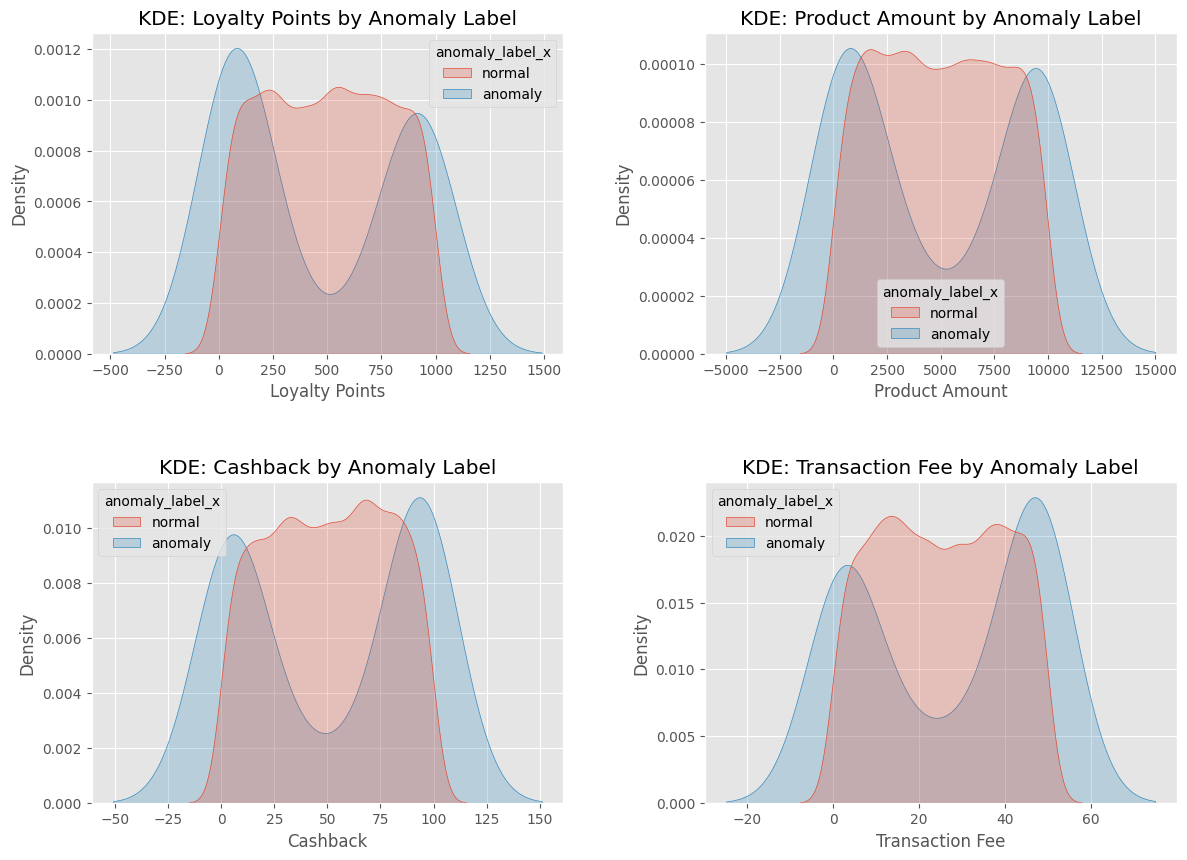

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# KDE plot 1: loyalty_points
sns.kdeplot(data=df, x='loyalty_points', hue='anomaly_label_x', fill=True, common_norm=False, ax=axes[0, 0])
axes[0, 0].set_title('KDE: Loyalty Points by Anomaly Label')
axes[0, 0].set_xlabel('Loyalty Points')

# KDE plot 2: product_amount
sns.kdeplot(data=df, x='product_amount', hue='anomaly_label_x', fill=True, common_norm=False, ax=axes[0, 1])
axes[0, 1].set_title('KDE: Product Amount by Anomaly Label')
axes[0, 1].set_xlabel('Product Amount')

# KDE plot 3: cashback
sns.kdeplot(data=df, x='cashback', hue='anomaly_label_x', fill=True, common_norm=False, ax=axes[1, 0])
axes[1, 0].set_title('KDE: Cashback by Anomaly Label')
axes[1, 0].set_xlabel('Cashback')

# KDE plot 4: transaction_fee
sns.kdeplot(data=df, x='transaction_fee', hue='anomaly_label_x', fill=True, common_norm=False, ax=axes[1, 1])
axes[1, 1].set_title('KDE: Transaction Fee by Anomaly Label')
axes[1, 1].set_xlabel('Transaction Fee')

plt.show()


In [64]:

# Chuyển đổi transaction_date sang datetime
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

# Các feature từ giá trị số
df['net_spending'] = df['product_amount'] - df['cashback']
df['fee_ratio'] = df['transaction_fee'] / df['product_amount']
df['cashback_ratio'] = df['cashback'] / df['product_amount']
df['points_per_dollar'] = df['loyalty_points'] / df['product_amount']

# Các feature thời gian
df['hour'] = df['transaction_date'].dt.hour
df['weekday'] = df['transaction_date'].dt.weekday
df['is_weekend'] = df['weekday'].isin([5, 6]).astype(int)

def get_day_part(hour):
    if hour < 6:
        return 'Night'
    elif hour < 12:
        return 'Morning'
    elif hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

df['day_part'] = df['hour'].apply(get_day_part)

# Các feature theo nhóm
df['transactions_per_user'] = df.groupby('user_id')['transaction_id'].transform('count')
df['avg_spent_per_user'] = df.groupby('user_id')['product_amount'].transform('mean')
df['merchant_transaction_count'] = df.groupby('merchant_id')['transaction_id'].transform('count')


In [65]:
df.head()

,transaction_id,user_id,transaction_date,product_category,product_name,merchant_name,product_amount,transaction_fee,cashback,loyalty_points,payment_method,transaction_status,merchant_id,device_type,location,anomaly_label_x,anomaly_label_y,net_spending,fee_ratio,cashback_ratio,points_per_dollar,hour,weekday,is_weekend,day_part,transactions_per_user,avg_spent_per_user,merchant_transaction_count
idx,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4dac3ea3-6492-46ec-80b8-dc45c3ad0b14,USER_05159,2023-08-19 03:32:00,Rent Payment,2BHK Flat Deposit,Airbnb,1525.39,36.69,19.19,186,Debit Card,Successful,MERCH_0083,iOS,Urban,normal,normal,1506.20,0.024053,0.012580,0.121936,3,5,1,Night,1,1525.39,9
2,a903ed9f-eb84-47e7-b8aa-fd1786c919cf,USER_07204,2023-08-19 04:37:00,Gas Bill,Commercial Gas Connection,Adani Gas,1495.40,28.19,89.99,182,UPI,Successful,MERCH_0163,iOS,Urban,normal,normal,1405.41,0.018851,0.060178,0.121707,4,5,1,Night,1,1495.40,9
3,2a393013-733c-4add-9f09-bed1eeb33676,USER_00903,2023-08-19 05:52:00,Bus Ticket,Semi-Sleeper,MakeMyTrip Bus,1267.71,11.36,95.70,994,UPI,Successful,MERCH_0320,iOS,Urban,normal,normal,1172.01,0.008961,0.075490,0.784091,5,5,1,Night,1,1267.71,6
4,9a07ad19-4673-4794-9cd2-9b139f39c715,USER_01769,2023-08-19 06:35:00,Internet Bill,4G Unlimited Plan,Airtel Broadband,9202.63,6.41,82.24,409,Debit Card,Successful,MERCH_0194,Android,Urban,normal,normal,9120.39,0.000697,0.008937,0.044444,6,5,1,Morning,1,9202.63,12
5,76418260-c985-4011-979d-0914604d0d68,USER_03544,2023-08-19 06:36:00,Loan Repayment,Home Loan EMI,Axis Bank,3100.58,41.15,40.47,837,Debit Card,Successful,MERCH_0504,Android,Urban,normal,normal,3060.11,0.013272,0.013052,0.269949,6,5,1,Morning,1,3100.58,4


In [66]:
df.columns

Index(['transaction_id', 'user_id', 'transaction_date', 'product_category',
       'product_name', 'merchant_name', 'product_amount', 'transaction_fee',
       'cashback', 'loyalty_points', 'payment_method', 'transaction_status',
       'merchant_id', 'device_type', 'location', 'anomaly_label_x',
       'anomaly_label_y', 'net_spending', 'fee_ratio', 'cashback_ratio',
       'points_per_dollar', 'hour', 'weekday', 'is_weekend', 'day_part',
       'transactions_per_user', 'avg_spent_per_user',
       'merchant_transaction_count'],
      dtype='object')

In [67]:
categories = ['weekday', 'is_weekend', 'day_part']

{'columns': ('weekday', 'anomaly_label_x'), 'p-value': 0.806660795659716, 'significant': False}
{'columns': ('is_weekend', 'anomaly_label_x'), 'p-value': 0.6157414347242606, 'significant': False}
{'columns': ('day_part', 'anomaly_label_x'), 'p-value': 0.7366673786390621, 'significant': False}


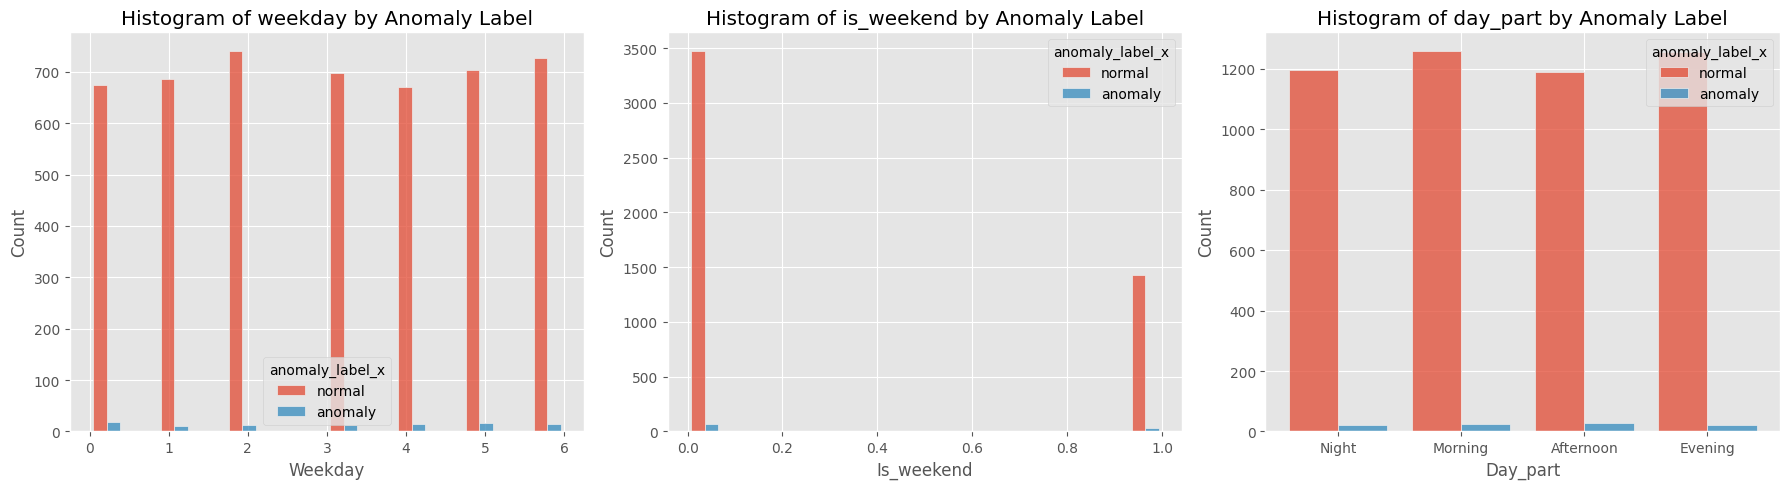

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Danh sách các biến phân loại
categories = ['weekday', 'is_weekend', 'day_part']
for col in categories:
    print(chi_squared_test(df, col, "anomaly_label_x"))

# Tạo figure 1 hàng 3 cột
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Vẽ từng biểu đồ
for i, cat in enumerate(categories):
    sns.histplot(data=df, x=cat, hue='anomaly_label_x', multiple='dodge', shrink=0.8, ax=axes[i])
    axes[i].set_title(f'Histogram of {cat} by Anomaly Label')
    axes[i].set_xlabel(cat.capitalize())
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()


In [69]:
df.to_csv("final.csv")